In [1]:
%conda install matploblib -y
%pip install gdown

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - matploblib

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import gdown
import pandas as pd
import numpy as np

## Importing Data

### pandas, gdown 

In [3]:
gdown.download("https://drive.google.com/uc?id=1LHvAYExWBy_c34JmqA_yAEL4u56ku2iE", "example_genome.csv", quiet=False)
example_genome = pd.read_csv('example_genome.csv')

Downloading...
From: https://drive.google.com/uc?id=1LHvAYExWBy_c34JmqA_yAEL4u56ku2iE
To: /Users/choijennifer/example_genome.csv
100%|██████████████████████████████████████| 9.47k/9.47k [00:00<00:00, 4.05MB/s]


### Data

In [4]:
example_genome.head()

,rsid,chromosome,position,genotype
0,rs4477212,1,72017,AA
1,rs3094315,1,742429,NaN
2,rs3131972,1,742584,GG
3,rs12124819,1,766409,AA
4,rs11240777,1,788822,AG


#### Specify rsid as index instead of numeric index (0, 1, 2, ...)

In [5]:
example_genome_idx = example_genome.set_index('rsid')
example_genome_idx.head()

,chromosome,position,genotype
rsid,,,
rs4477212,1,72017,AA
rs3094315,1,742429,NaN
rs3131972,1,742584,GG
rs12124819,1,766409,AA
rs11240777,1,788822,AG


#### Identify data types

In [6]:
example_genome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rsid        393 non-null    object
 1   chromosome  393 non-null    int64 
 2   position    393 non-null    int64 
 3   genotype    385 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.4+ KB


#### Identify missing values

In [7]:
# 어떤 열에 결측치가 있는지 확인
example_genome.isnull().any()

rsid          False
chromosome    False
position      False
genotype       True
dtype: bool

In [8]:
# 해당 열의 결측치 수 확인
example_genome['genotype'].isnull().sum()

8

### Processing missing values

In [9]:
# 결측치를 포함하는 행 자체를 제거
display(example_genome.dropna())

## 결측치를 적절한 값으로 대체
# 결측치 바로 뒤의 값으로 대체
display(example_genome.fillna(method="backfill"))

# 결측치 바로 앞의 값으로 대체
display(example_genome.fillna(method="ffill"))

# 최빈값으로 대체
display(example_genome.fillna(example_genome.mode()["genotype"][0]))

,rsid,chromosome,position,genotype
0,rs4477212,1,72017,AA
2,rs3131972,1,742584,GG
3,rs12124819,1,766409,AA
4,rs11240777,1,788822,AG
5,rs6681049,1,789870,CC
...,...,...,...,...
387,rs6671420,1,2328739,AA
389,rs61750434,1,2329978,GG
390,rs11811122,1,2335826,TT
391,rs3935659,1,2341559,TT


,rsid,chromosome,position,genotype
0,rs4477212,1,72017,AA
1,rs3094315,1,742429,GG
2,rs3131972,1,742584,GG
3,rs12124819,1,766409,AA
4,rs11240777,1,788822,AG
...,...,...,...,...
388,rs2494428,1,2328934,GG
389,rs61750434,1,2329978,GG
390,rs11811122,1,2335826,TT
391,rs3935659,1,2341559,TT


,rsid,chromosome,position,genotype
0,rs4477212,1,72017,AA
1,rs3094315,1,742429,AA
2,rs3131972,1,742584,GG
3,rs12124819,1,766409,AA
4,rs11240777,1,788822,AG
...,...,...,...,...
388,rs2494428,1,2328934,AA
389,rs61750434,1,2329978,GG
390,rs11811122,1,2335826,TT
391,rs3935659,1,2341559,TT


,rsid,chromosome,position,genotype
0,rs4477212,1,72017,AA
1,rs3094315,1,742429,CC
2,rs3131972,1,742584,GG
3,rs12124819,1,766409,AA
4,rs11240777,1,788822,AG
...,...,...,...,...
388,rs2494428,1,2328934,CC
389,rs61750434,1,2329978,GG
390,rs11811122,1,2335826,TT
391,rs3935659,1,2341559,TT


## Processing Outliers

### standardizing method

In [10]:
def std_outlier(data):
    for i in range(len(data.iloc[1])):
        print(f"mean: {data.iloc[:, i].mean()}")
        print(f"std: {data.iloc[:, i].std()}")
        data = data[~(np.abs(data.iloc[:, i] - data.iloc[:, i].mean()) > (3 * data.iloc[:, i].std()))]
    
    data = data.reset_index(drop=True)
    return data

### IQR method

In [11]:
def iqr_outlier(data):
    for i in range(len(data.iloc[1])):
        q1, q3 = np.percentile(data.iloc[:, i], [25, 75])
        print(f"q1: {q1}")
        print(f"q3: {q3}")

        iqr = q3 - q1
        lower = q1 - (iqr * 1.5)
        upper = q3 + (iqr * 1.5)
        print(f"lower: {lower}")
        print(f"upper: {upper}")

        data = data[data.iloc[:, i] < upper]
        data = data[data.iloc[:, i] > lower]
        
    data = data.reset_index(drop=True)
    return data

### Practice

<Axes: xlabel='X', ylabel='Y'>

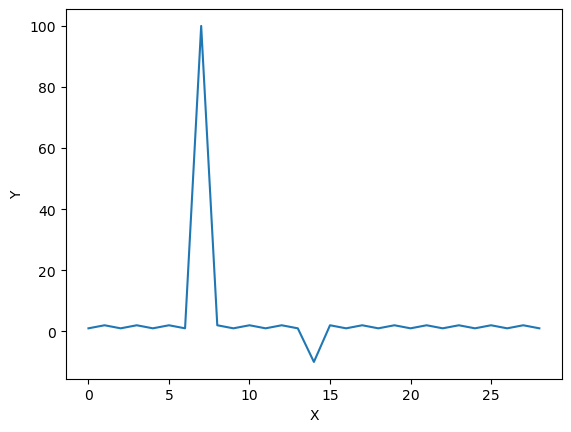

In [12]:
example = pd.DataFrame([1, 2, 1, 2, 1, 2, 1, 100, 2, 1, 2, 1, 2, 1, -10, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1])
example.plot(legend=False, xlabel="X", ylabel="Y")

mean: 4.482758620689655
std: 18.500232990145157


<Axes: xlabel='X', ylabel='Y'>

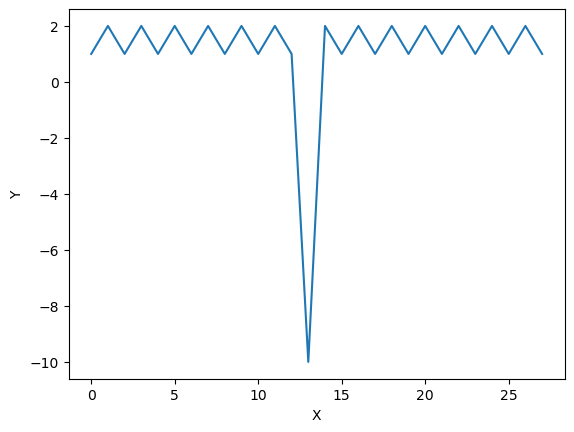

In [13]:
# Standarization method
wo_outlier = std_outlier(example)
wo_outlier.plot(legend=False, xlabel="X", ylabel="Y")

q1: 1.0
q3: 2.0
lower: -0.5
upper: 3.5


<Axes: xlabel='X', ylabel='Y'>

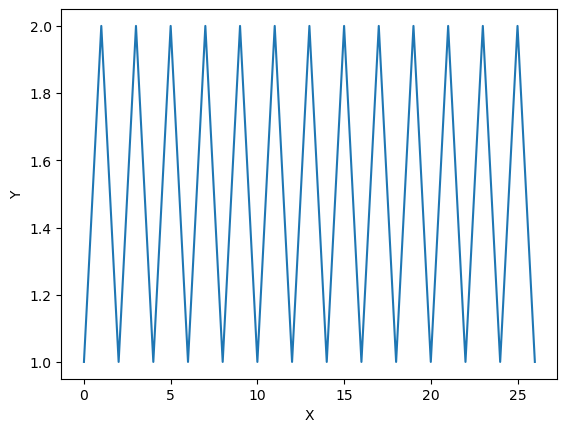

In [14]:
# IQR method
wo_outlier = iqr_outlier(example)
wo_outlier.plot(legend=False, xlabel="X", ylabel="Y")

## Converting data distribution

<Axes: xlabel='X', ylabel='Y'>

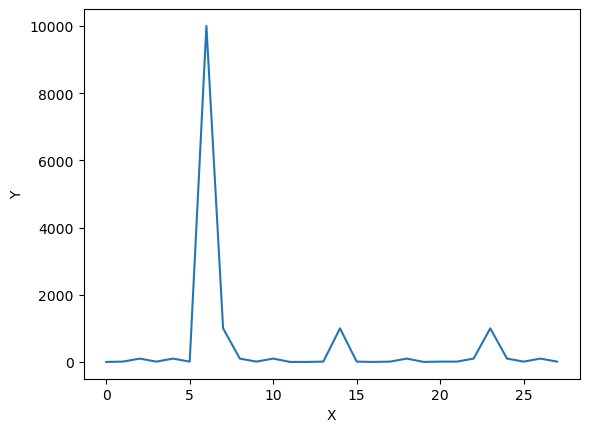

In [15]:
example = pd.DataFrame({'number': [1, 10, 100, 10, 100, 10, 10000, 1000, 100, 10, 100, 1, 1, 10, 1000, 10, 1, 10, 100, 1, 10, 10, 100, 1000, 100, 10, 100, 10]})
example.plot(legend=False, xlabel="X", ylabel="Y")

<Axes: >

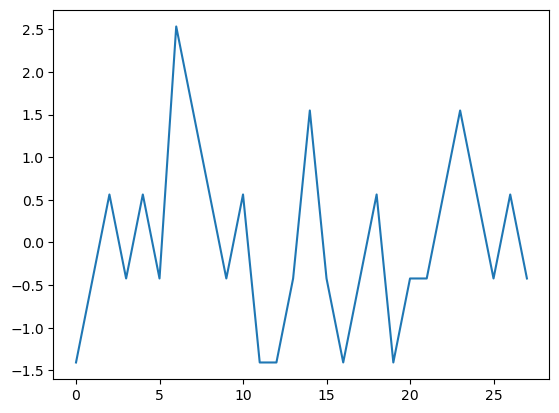

In [16]:
from sklearn import preprocessing

example['number_log'] = preprocessing.scale(np.log(example['number']))
example['number_log'].plot()

## Converting data units

<Axes: xlabel='X', ylabel='Y'>

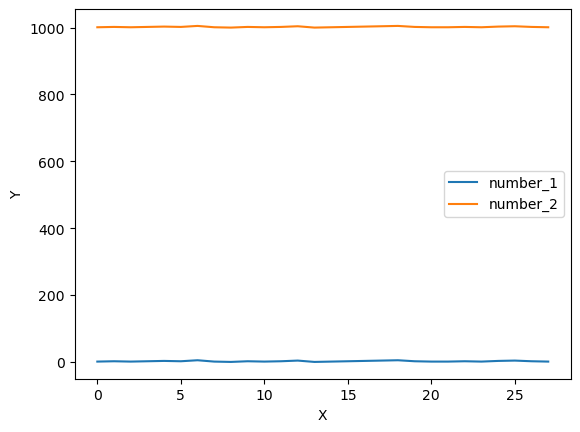

In [17]:
raw_1 = [1, 2, 1, 2, 3, 2, 5, 1, 0, 2, 1, 2, 4, 0, 1, 2, 3, 4, 5, 2, 1, 1, 2, 1, 3, 4, 2, 1]
raw_2 = map(lambda x: x + 1000, raw_1)

example = pd.DataFrame({'number_1': raw_1, 'number_2': raw_2})
example.plot(xlabel="X", ylabel="Y")

### Standarization

<Axes: xlabel='X', ylabel='Y'>

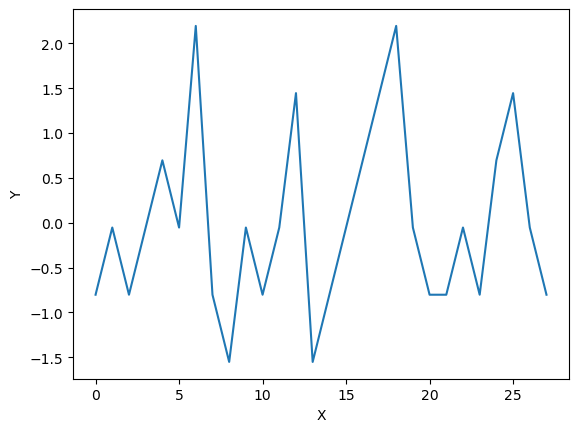

In [18]:
example_norm = example
example_norm['number_1'] = preprocessing.scale(example['number_1'])
example_norm['number_1'].plot(xlabel="X", ylabel="Y")

<Axes: xlabel='X', ylabel='Y'>

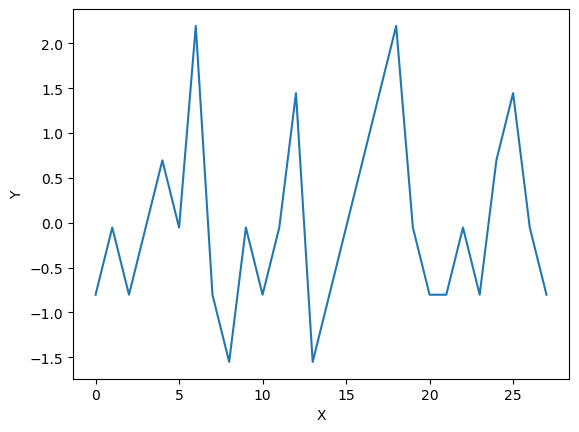

In [19]:
example_norm['number_2'] = preprocessing.scale(example['number_2'])
example_norm['number_2'].plot(xlabel="X", ylabel="Y")

### IQR Scaling

<Axes: xlabel='X', ylabel='Y'>

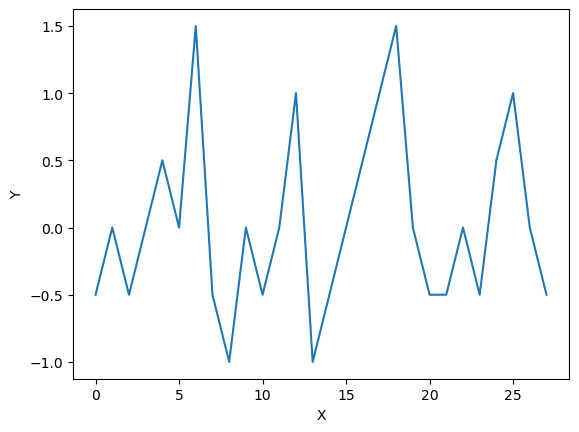

In [20]:
example_iqr = example
example_iqr['number_1'] = preprocessing.robust_scale(example['number_1'])
example_iqr['number_1'].plot(xlabel="X", ylabel="Y")

<Axes: xlabel='X', ylabel='Y'>

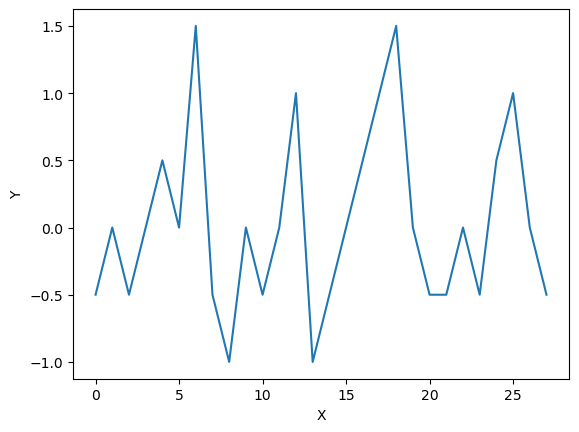

In [21]:
example_iqr['number_2'] = preprocessing.robust_scale(example['number_2'])
example_iqr['number_2'].plot(xlabel="X", ylabel="Y")

### MinMax Scaling
최솟값 1, 최댓값 10

<Axes: xlabel='X', ylabel='Y'>

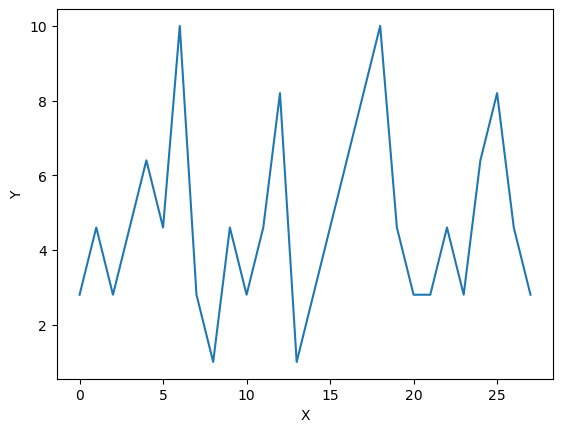

In [22]:
example_mm = example
example_mm['number_1'] = preprocessing.minmax_scale(example['number_1'], (1, 10))
example_mm['number_1'].plot(xlabel="X", ylabel="Y")

<Axes: xlabel='X', ylabel='Y'>

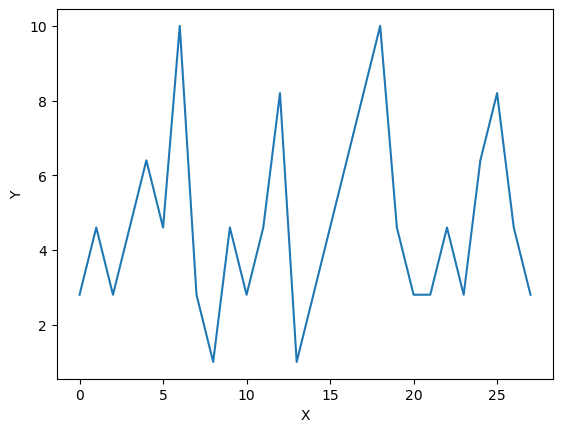

In [23]:
example_mm['number_2'] = preprocessing.minmax_scale(example['number_2'], (1, 10))
example_mm['number_2'].plot(xlabel="X", ylabel="Y")

## Processing Categorical Data

In [24]:
# 실습을 위한 예제 데이터
example = pd.DataFrame({'category': ['청소년', '청소년', '청년', '청년', '청소년', '장년', '청년', '장년']})
example.head()

,category
0,청소년
1,청소년
2,청년
3,청년
4,청소년


### One-hot Encoding

In [25]:
example_onehot = pd.get_dummies(example, prefix=['age'])
example_onehot.head(n=10)

,age_장년,age_청년,age_청소년
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,1,0,0
6,0,1,0
7,1,0,0


### Using dummy variable

In [26]:
example_dummy = pd.get_dummies(example, drop_first=True, prefix=['age'])
example_dummy.head(n=10)

,age_청년,age_청소년
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
5,0,0
6,1,0
7,0,0


## Practice

### Practice data preprocessing
- The following are statistics on cancer outbreaks by state in the United States.  
https://drive.google.com/file/d/1gXstv4K89TjoE_8QrJDIgzwkDaj1MwvA/view?usp=sharing

- Download the above statistics under the name 'cancer.csv' using the gdown package and store them in the variable 'cancer' using the pandemic package.

In [27]:
gdown.download("https://drive.google.com/uc?id=1gXstv4K89TjoE_8QrJDIgzwkDaj1MwvA", "cancer.csv", quiet=False)
cancer = pd.read_csv('cancer.csv')

Downloading...
From: https://drive.google.com/uc?id=1gXstv4K89TjoE_8QrJDIgzwkDaj1MwvA
To: /Users/choijennifer/cancer.csv
100%|██████████████████████████████████████| 1.27k/1.27k [00:00<00:00, 7.30MB/s]


In [28]:
cancer.head()

,State,Range,Rate
0,AK,164.2 to 174.4,173.1
1,AL,174.5 to 199.3,182.1
2,AR,174.5 to 199.3,189.6
3,AZ,127.9 to 155.3,146.4
4,CA,127.9 to 155.3,146.6


- The state name of the United States does not allow duplication, so it is suitable for use as an index. Apply this to the canceller variable.

In [29]:
cancer = cancer.set_index('State', drop=True)

In [30]:
cancer.head(n=20)

,Range,Rate
State,,
AK,164.2 to 174.4,173.1
AL,174.5 to 199.3,182.1
AR,174.5 to 199.3,189.6
AZ,127.9 to 155.3,146.4
CA,127.9 to 155.3,146.6
CO,127.9 to 155.3,139.2
CT,127.9 to 155.3,147.8
DC,174.5 to 199.3,177.7
DE,164.2 to 174.4,167.1


- It was confirmed that there was no data from some states due to a lack of statistical personnel.  
  - There is no plausible basis for estimating missing values. Therefore, it was decided to exclude rows including missing values.
  - Treat missing values according to the above method.

In [31]:
cancer = cancer.dropna()

In [32]:
cancer.head(n=20)

,Range,Rate
State,,
AK,164.2 to 174.4,173.1
AL,174.5 to 199.3,182.1
AR,174.5 to 199.3,189.6
AZ,127.9 to 155.3,146.4
CA,127.9 to 155.3,146.6
CO,127.9 to 155.3,139.2
CT,127.9 to 155.3,147.8
DC,174.5 to 199.3,177.7
DE,164.2 to 174.4,167.1


- In addition, in some states, it was confirmed that too large a value was included by mistake.
  - Treat the outlier in a standardized manner.  

In [33]:
def std_outlier(data):
    for i in range(len(data.iloc[1])):
        if type(data.iloc[0, i]) != np.int64 and type(data.iloc[0, i]) != np.float64:
            continue
        print(f"mean: {data.iloc[:, i].mean()}")
        print(f"std: {data.iloc[:, i].std()}")
        data = data[~(np.abs(data.iloc[:, i] - data.iloc[:, i].mean()) > (3 * data.iloc[:, i].std()))]
    
    return data

cancer = std_outlier(cancer)

mean: 4328.00625
std: 28843.792942657456


In [34]:
cancer.head(n=20)

,Range,Rate
State,,
AK,164.2 to 174.4,173.1
AL,174.5 to 199.3,182.1
AR,174.5 to 199.3,189.6
AZ,127.9 to 155.3,146.4
CA,127.9 to 155.3,146.6
CO,127.9 to 155.3,139.2
CT,127.9 to 155.3,147.8
DC,174.5 to 199.3,177.7
DE,164.2 to 174.4,167.1


- Finally, these statistics include categorical data.
- Treat it in a one-hot encoding manner.

In [35]:
cancer = pd.get_dummies(cancer, prefix=['range'])

In [36]:
cancer.head(n=10)

,Rate,range_127.9 to 155.3,range_155.4 to 164.1,range_164.2 to 174.4,range_174.5 to 199.3
State,,,,,
AK,173.1,0,0,1,0
AL,182.1,0,0,0,1
AR,189.6,0,0,0,1
AZ,146.4,1,0,0,0
CA,146.6,1,0,0,0
CO,139.2,1,0,0,0
CT,147.8,1,0,0,0
DC,177.7,0,0,0,1
DE,167.1,0,0,1,0
